# Import library

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.utils import shuffle
from io import StringIO
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
import nltk
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


import warnings
warnings.filterwarnings("ignore")

# Read data

In [19]:
df = pd.read_excel("./FreeJAR_Tea.xlsx")
df.head(2)

,No,Jugde,Product,Hedonic,Free JAR comment
0,1,1,709,B,"ngọt_không_đủ,mùi_thơm_vừa_đủ,màu_quá_đậm"
1,2,1,495,C,"ngọt_không_đủ,mùi_thơm_không_đủ,màu_không_đủ"


In [136]:
print('Number of participant: {0}'.format(len(df['Jugde'].unique())))
print('Number of product: {0}'.format(len(df['Product'].unique())))
print('Number of hedonic categories: {0}'.format(len(df['Hedonic'].unique())))

Number of participant: 88
Number of product: 7
Number of hedonic categories: 3


### Find unique of attribute which describle by participant

In [20]:
df_lower = df['Free JAR comment'].str.lower()
a = np.array(df_lower.str.split(',', expand=True)).flatten()
filtered_array = [value for value in a if value is not None]
terms = np.unique(filtered_array)
terms

array(['', 'chua_không_đủ', 'chua_quá_nhiều', 'chua_vừa_đủ',
       'chát_không_đủ', 'chát_quá_nhiều', 'chát_vừa_đủ',
       'cảm_giác_ấm_không_đủ', 'gắt_quá_nhiều', 'hậu_vị_chua_vừa_đủ',
       'hậu_vị_chát_quá_nhiều', 'hậu_vị_chát_vừa_đủ', 'hậu_vị_không_đủ',
       'hậu_vị_ngọt_không_đủ', 'hậu_vị_ngọt_vừa_đủ', 'hậu_vị_quá_nhiều',
       'hậu_vị_vừa_đủ', 'hậu_vị_đắng_không_đủ', 'hậu_vị_đắng_quá_nhiều',
       'hậu_vị_đắng_vừa_đủ', 'lợ_quá_nhiều', 'màu_không_đủ',
       'màu_nâu_đậm_quá_nhiều', 'màu_quá_đậm', 'màu_vàng_cam_quá_nhiều',
       'màu_vàng_cam_vừa_đủ', 'màu_vàng_nâu_không_đủ',
       'màu_vàng_nâu_quá_nhiều', 'màu_vàng_nâu_vừa_đủ',
       'màu_vàng_quá_nhiều', 'màu_vừa_đủ', 'màu_đỏ_cam_quá_nhiều',
       'màu_đỏ_cam_vừa_đủ', 'mùi_caramen_không_đủ', 'mùi_caramen_vừa_đủ',
       'mùi_chua_vừa_đủ', 'mùi_chát_vừa_đủ', 'mùi_dịu_vừa_đủ',
       'mùi_hoa_không_đủ', 'mùi_hoa_vừa_đủ', 'mùi_hương_hoa_không_đủ',
       'mùi_lá_cây_vừa_đủ', 'mùi_lá_khô_không_đủ', 'mùi_lá_khô_vừa_đủ',
 

#### Remove the nan terms

In [21]:
filtered_terms = [term for term in terms if term != '']
filtered_terms

['chua_không_đủ',
 'chua_quá_nhiều',
 'chua_vừa_đủ',
 'chát_không_đủ',
 'chát_quá_nhiều',
 'chát_vừa_đủ',
 'cảm_giác_ấm_không_đủ',
 'gắt_quá_nhiều',
 'hậu_vị_chua_vừa_đủ',
 'hậu_vị_chát_quá_nhiều',
 'hậu_vị_chát_vừa_đủ',
 'hậu_vị_không_đủ',
 'hậu_vị_ngọt_không_đủ',
 'hậu_vị_ngọt_vừa_đủ',
 'hậu_vị_quá_nhiều',
 'hậu_vị_vừa_đủ',
 'hậu_vị_đắng_không_đủ',
 'hậu_vị_đắng_quá_nhiều',
 'hậu_vị_đắng_vừa_đủ',
 'lợ_quá_nhiều',
 'màu_không_đủ',
 'màu_nâu_đậm_quá_nhiều',
 'màu_quá_đậm',
 'màu_vàng_cam_quá_nhiều',
 'màu_vàng_cam_vừa_đủ',
 'màu_vàng_nâu_không_đủ',
 'màu_vàng_nâu_quá_nhiều',
 'màu_vàng_nâu_vừa_đủ',
 'màu_vàng_quá_nhiều',
 'màu_vừa_đủ',
 'màu_đỏ_cam_quá_nhiều',
 'màu_đỏ_cam_vừa_đủ',
 'mùi_caramen_không_đủ',
 'mùi_caramen_vừa_đủ',
 'mùi_chua_vừa_đủ',
 'mùi_chát_vừa_đủ',
 'mùi_dịu_vừa_đủ',
 'mùi_hoa_không_đủ',
 'mùi_hoa_vừa_đủ',
 'mùi_hương_hoa_không_đủ',
 'mùi_lá_cây_vừa_đủ',
 'mùi_lá_khô_không_đủ',
 'mùi_lá_khô_vừa_đủ',
 'mùi_ngọt_không_đủ',
 'mùi_ngọt_quá_nhiều',
 'mùi_ngọt_vừa_đủ',
 '

## Create a contigent table

In [22]:
df2 = pd.DataFrame()
for i in df['Product'].unique():
    df_lower = df[df['Product'] == i]['Free JAR comment'].str.lower()

    word_array = np.array(filtered_terms)
    # Hàm đếm tần số xuất hiện của từng từ trong một ô
    def count_word_frequency(cell, word):
        words = cell.split(',')
        return words.count(word)

    # Áp dụng hàm đếm tần số cho từng ô trong DataFrame
    word_frequency_df = pd.DataFrame()
    for word in word_array:
        word_frequency_df[word] = pd.DataFrame(df_lower).applymap(lambda cell: count_word_frequency(cell, word))
    df2 = pd.concat([df2, pd.DataFrame(word_frequency_df.sum())], axis=1)
    # Hiển thị DataFrame kết quả
df2.columns = df['Product'].unique()
#df2.index = df2.index.map(lambda x: str(x) + '_Mùi')
df2

,709,495,913,582,136,378,875
chua_không_đủ,0,0,3,3,1,0,2
chua_quá_nhiều,3,4,4,4,4,2,1
chua_vừa_đủ,1,2,4,0,3,2,7
chát_không_đủ,1,12,4,12,7,7,5
chát_quá_nhiều,43,9,46,10,37,45,29
...,...,...,...,...,...,...,...
vị_trà_vừa_đủ,0,1,0,0,0,0,0
đắng_không_đủ,4,6,5,10,2,5,3
đắng_quá_nhiều,18,12,23,13,37,31,21
đắng_vừa_đủ,11,13,13,15,7,13,15


In [84]:
df2.to_excel("./FreeJAR_ML_Processed_Total.xlsx")

## Creat table to extract terms

In [23]:
df3 = pd.DataFrame()
for i in df['No'].unique():
    df_lower = df[df['No'] == i]['Free JAR comment'].str.lower()

    word_array = np.array(filtered_terms)
    # Hàm đếm tần số xuất hiện của từng từ trong một ô
    def count_word_frequency(cell, word):
        words = cell.split(',')
        return words.count(word)

    # Áp dụng hàm đếm tần số cho từng ô trong DataFrame
    word_frequency_df = pd.DataFrame()
    for word in word_array:
        word_frequency_df[word] = pd.DataFrame(df_lower).applymap(lambda cell: count_word_frequency(cell, word))
    df3 = pd.concat([df3, pd.DataFrame(word_frequency_df.sum())], axis=1)
    # Hiển thị DataFrame kết quả
df3.columns = df['No'].unique()
df3

,1,2,3,4,5,6,7,8,9,10,...,607,608,609,610,611,612,613,614,615,616
chua_không_đủ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chua_quá_nhiều,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
chua_vừa_đủ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chát_không_đủ,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
chát_quá_nhiều,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vị_trà_vừa_đủ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
đắng_không_đủ,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
đắng_quá_nhiều,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,1
đắng_vừa_đủ,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
df4 = df3.T
df4['No'] = df4.index
df4.head(2)

,chua_không_đủ,chua_quá_nhiều,chua_vừa_đủ,chát_không_đủ,chát_quá_nhiều,chát_vừa_đủ,cảm_giác_ấm_không_đủ,gắt_quá_nhiều,hậu_vị_chua_vừa_đủ,hậu_vị_chát_quá_nhiều,...,vị_nhạt_không_đủ,vị_thanh_vừa_đủ,vị_trà_không_đủ,vị_trà_quá_nhiều,vị_trà_vừa_đủ,đắng_không_đủ,đắng_quá_nhiều,đắng_vừa_đủ,đặc_quá_nhiều,No
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


#### Combine 2 dataframe

In [30]:
df5 = pd.merge(df, df4, on=['No','No'], how='inner')
df5

,No,Jugde,Product,Hedonic,Free JAR comment,chua_không_đủ,chua_quá_nhiều,chua_vừa_đủ,chát_không_đủ,chát_quá_nhiều,...,vị_kim_loại_quá_nhiều,vị_nhạt_không_đủ,vị_thanh_vừa_đủ,vị_trà_không_đủ,vị_trà_quá_nhiều,vị_trà_vừa_đủ,đắng_không_đủ,đắng_quá_nhiều,đắng_vừa_đủ,đặc_quá_nhiều
0,1,1,709,B,"ngọt_không_đủ,mùi_thơm_vừa_đủ,màu_quá_đậm",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,495,C,"ngọt_không_đủ,mùi_thơm_không_đủ,màu_không_đủ",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,913,C,"đắng_quá_nhiều,chát_quá_nhiều,màu_vừa_đủ",0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4,1,582,B,"mùi_thơm_vừa_đủ,chát_vừa_đủ,đắng_không_đủ,màu_...",0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,1,136,C,"mùi_thơm_vừa_đủ,chát_vừa_đủ,đắng_quá_nhiều,màu...",0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,612,88,913,B,"mùi_thơm_không_đủ,màu_vừa_đủ,đắng_vừa_đủ",0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
612,613,88,582,B,"mùi_thơm_vừa_đủ,màu_vừa_đủ,đắng_không_đủ",0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
613,614,88,136,C,"mùi_thơm_không_đủ,màu_quá_đậm,đắng_quá_nhiều",0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
614,615,88,378,C,"mùi_thơm_không_đủ,màu_quá_đậm,đắng_quá_nhiều",0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### label encoding for classification ML

In [32]:
df5['Hedonic'] = df5['Hedonic'].replace({'A':'3',
                        'B':'2',
                        'C':'1'})

In [35]:
df5.to_excel("./FreeJAR_ML_Processed.xlsx")

In [76]:
df5 = pd.read_excel("./FreeJAR_ML_Processed.xlsx")

## Creat Matrix X and y for train model

In [77]:
X = df5.iloc[:,6:]
y = df5['Hedonic']

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [39]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X, X, y, y)

print(models)

100%|██████████| 29/29 [00:02<00:00,  9.89it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 616, number of used features: 17
[LightGBM] [Info] Start training from score -0.706219
[LightGBM] [Info] Start training from score -1.061955
[LightGBM] [Info] Start training from score -1.828127
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

### Using LazyClassifier to examine which types of models perform well

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 16.61it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 431, number of used features: 16
[LightGBM] [Info] Start training from score -0.709522
[LightGBM] [Info] Start training from score -1.089374
[LightGBM] [Info] Start training from score -1.762043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

#### ExtraTrees, Baggging or RandomForest have highest accuracy
##### So use RandomForest to an approach for this project
##### And using GridSearchCV to investigate best parameter

In [67]:
param_grid = { 
    'n_estimators': [100, 200, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,15,20],
    'criterion' :['gini', 'entropy']
}

In [68]:
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500, 700]})

In [69]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 100}

In [70]:
# Build the model with Random Forest Regressor :
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_features='log2', max_depth=15)
model.fit(X, y)

RandomForestClassifier(max_depth=15, max_features='log2')

### Print confusion matrix and report of model

In [71]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [72]:
# Predict on the test set
y_pred = model.predict(X)

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[289  13   2]
 [ 41 169   3]
 [  9  15  75]]


In [74]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.95      0.90       304
           2       0.86      0.79      0.82       213
           3       0.94      0.76      0.84        99

    accuracy                           0.87       616
   macro avg       0.88      0.83      0.85       616
weighted avg       0.87      0.87      0.86       616



### Calculate Valency Score that is probability of class "I like product" - probability of class "I don't like product"

In [130]:
probabilities_RF = model.predict_proba(X)
hedonic_prob_RF = pd.DataFrame(probabilities_RF, columns=model.classes_)

# Kết hợp DataFrame mới với bộ dữ liệu ban đầu
RF_data = pd.concat([df5, hedonic_prob_RF], axis=1)

RF_VS  = RF_data['3'] - RF_data['1']
RF_data['RF_VS'] = RF_VS
RF_data.head(5)


,Unnamed: 0,No,Jugde,Product,Hedonic,Free JAR comment,chua_không_đủ,chua_quá_nhiều,chua_vừa_đủ,chát_không_đủ,...,vị_trà_quá_nhiều,vị_trà_vừa_đủ,đắng_không_đủ,đắng_quá_nhiều,đắng_vừa_đủ,đặc_quá_nhiều,1,2,3,RF_VS
0,0,1,1,709,2,"ngọt_không_đủ,mùi_thơm_vừa_đủ,màu_quá_đậm",0,0,0,0,...,0,0,0,0,0,0,0.13,0.79,0.08,-0.06
1,1,2,1,495,1,"ngọt_không_đủ,mùi_thơm_không_đủ,màu_không_đủ",0,0,0,0,...,0,0,0,0,0,0,0.87,0.12,0.02,-0.85
2,2,3,1,913,1,"đắng_quá_nhiều,chát_quá_nhiều,màu_vừa_đủ",0,0,0,0,...,0,0,0,1,0,0,0.85,0.12,0.02,-0.83
3,3,4,1,582,2,"mùi_thơm_vừa_đủ,chát_vừa_đủ,đắng_không_đủ,màu_...",0,0,0,0,...,0,0,1,0,0,0,0.19,0.68,0.13,-0.06
4,4,5,1,136,1,"mùi_thơm_vừa_đủ,chát_vừa_đủ,đắng_quá_nhiều,màu...",0,0,0,0,...,0,0,0,1,0,0,0.79,0.11,0.10,-0.69


In [131]:
RF_data.to_excel("./FreeJAR_ML_Processed2.xlsx")

#### Visualize Important Features

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

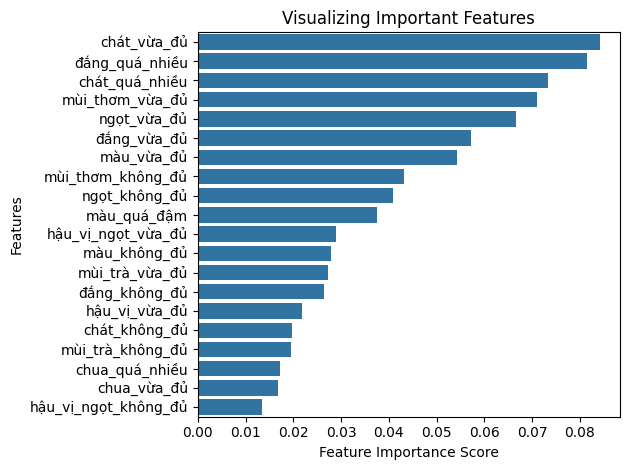

In [110]:
feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:20]
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
plt.tight_layout()
# Visualize the graph
plt.show()

In [91]:
# Lấy độ quan trọng của đặc trưng
feature_importances = model.feature_importances_

# Hiển thị độ quan trọng
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

Feature 0: 0.011125325034897493
Feature 1: 0.017286189869464976
Feature 2: 0.01674085057846287
Feature 3: 0.01980566277833695
Feature 4: 0.07333134570032827
Feature 5: 0.08421626069277532
Feature 6: 0.0020981155883361266
Feature 7: 0.0017077340532723423
Feature 8: 0.0009752488775109143
Feature 9: 0.0010892788494677968
Feature 10: 0.004120452581475142
Feature 11: 0.008352643653197565
Feature 12: 0.01337076884069532
Feature 13: 0.028989893546899508
Feature 14: 0.00249827163981244
Feature 15: 0.021825137405989754
Feature 16: 0.0029277064630483826
Feature 17: 0.0012126833705267345
Feature 18: 0.0032184043817412925
Feature 19: 0.00074805499071806
Feature 20: 0.027965946884859337
Feature 21: 0.0003139829184256647
Feature 22: 0.037513244910270103
Feature 23: 0.0024389997703385996
Feature 24: 0.004364265121653824
Feature 25: 0.0002954560268536776
Feature 26: 0.0015151756977602423
Feature 27: 0.002670698648302889
Feature 28: 0.002024078209467951
Feature 29: 0.05434515726572536
Feature 30: 0.000

### Using SHAP to intepret the impact of feature to classifying hedonic categories for all observation

In [93]:
import shap

# Tạo explainer SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [105]:
shap_values.shape

(616, 77, 3)

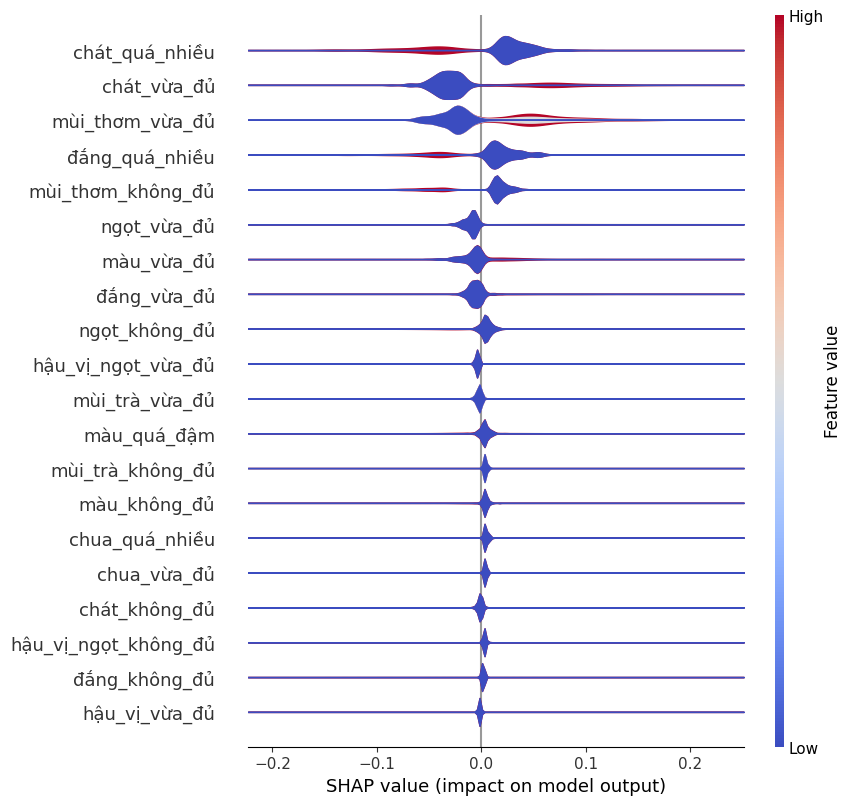

In [132]:
shap.plots.violin(shap_values[:,:,2], features=X, feature_names=X.columns.values.tolist(), plot_type="layered_violin")

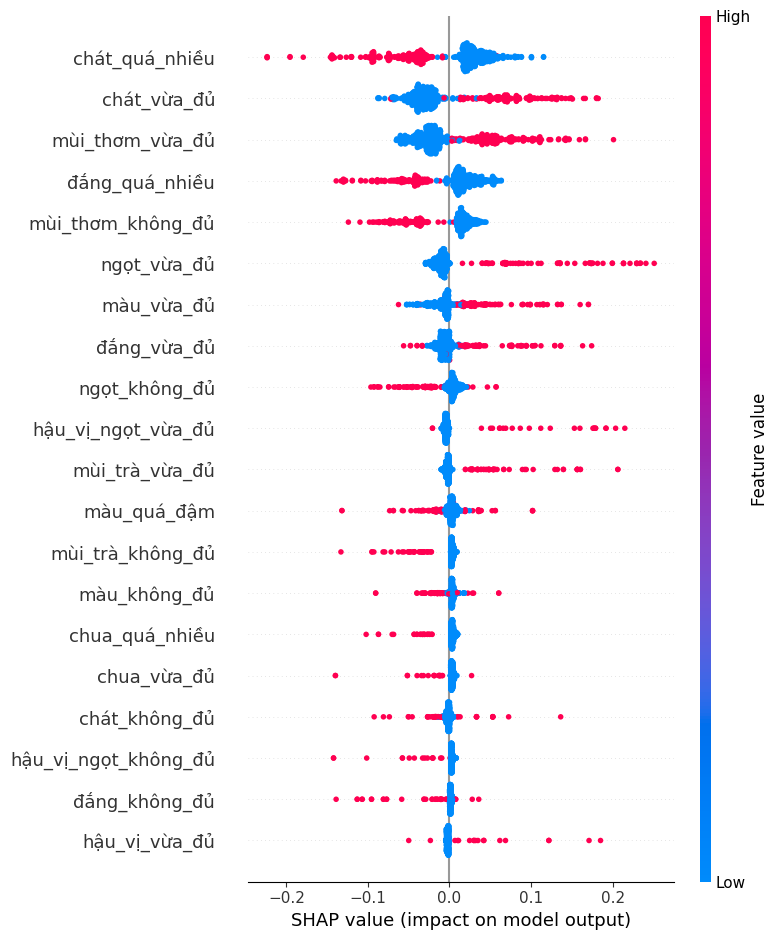

In [133]:
shap.summary_plot(shap_values[:,:,2], X)

### Use LIME to interpret the impact of specificity on classifying hedonic categories for each observation

In [41]:
import lime
import lime.lime_tabular

In [112]:
class_names = model.classes_
class_names

array(['1', '2', '3'], dtype=object)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns.values.tolist(),
                                                  class_names=class_names, mode='classification')

In [ ]:
exp = explainer.explain_instance(X.values[1], model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)